<a href="https://colab.research.google.com/github/samyakshah3/Data-science/blob/main/Student's_Marks_Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Students Marks Prediction using Supervised ML
 # By :- Samyak Shah      

# To Explore Supervised Machine Learning
   In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. Data can be found at  http://bit.ly/w-data 

# Importing all the libraries 

In [2]:
#Importing all libraries required in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

In [3]:
# Reading data from remote link
path = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(path)

In [4]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
df.shape

(25, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


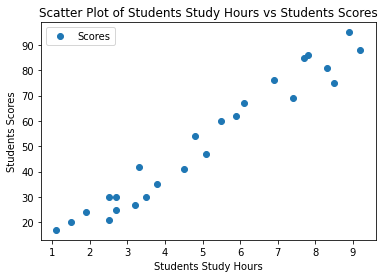

In [9]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')
plt.xlabel("Students Study Hours")
plt.ylabel("Students Scores")
plt.title("Scatter Plot of Students Study Hours vs Students Scores")
plt.show()

# Prepare the data for ML algorithm

In [10]:
# Data Cleaning

In [11]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [12]:
X = df.drop("Scores", axis = "columns")
y = df.drop("Hours", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (25, 1)
shape of y =  (25, 1)


In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Select a model and test it

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:

regressor.coef_

array([[9.91065648]])

In [16]:

regressor.intercept_

array([2.01816004])

In [17]:
m = 9.91
c = 2.01
y= m * (8)  + c
y

81.29

In [18]:
regressor.predict([[8]])[0][0].round(2)

81.3

In [19]:
y_pred = regressor.predict(X_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [20]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["Study Hours", "Scores Obtained", "Scores_predicted"])

,Study Hours,Scores Obtained,Scores_predicted
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


In [21]:
regressor.score(X_test, y_test)

0.9454906892105354

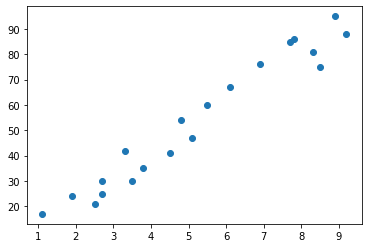

In [22]:
plt.scatter(X_train, y_train)

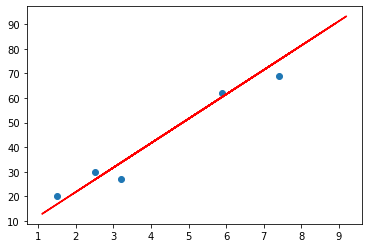

In [23]:
plt.scatter(X_test, y_test)
plt.plot(X_train, regressor.predict(X_train), color = "r")

# Evaluating the model

In [24]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


# Present your Solution

In [25]:
import joblib
joblib.dump(regressor, "Students_Marks_Predictor_Model.pk1")

['Students_Marks_Predictor_Model.pk1']

In [26]:
model = joblib.load("Students_Marks_Predictor_Model.pk1")

In [27]:
model.predict([[9.25]])[0][0]

93.69173248737539